## Training LSTM Model to genrate Literature.

#### Importing Libraries

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import matplotlib.pyplot as plt

#### Importing and Pre-processing Data

In [2]:
tokenizer = Tokenizer()
data = open('../input/poem-generation/poem.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

print(max_sequence_len)

16


#### Buildig and Compiling Model

In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2021-11-13 10:40:05.265473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-13 10:40:05.372705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-13 10:40:05.373433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-13 10:40:05.374574: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           380800    
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 15, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1904)              192304    
_________________________________________________________________
dense_1 (Dense)              (None, 3808)              7254240   
Total params: 8,288,944
Trainable params: 8,288,944
Non-trainable params: 0
______________________________________________

#### Training Model

In [5]:
history = model.fit(predictors, label, epochs=300, verbose=1)

2021-11-13 10:40:14.810887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2021-11-13 10:40:18.984603: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


510/510 [==============================] - 10s 9ms/step - loss: 6.9829 - accuracy: 0.0611
Epoch 2/300
510/510 [==============================] - 5s 9ms/step - loss: 6.5320 - accuracy: 0.0629
Epoch 3/300
510/510 [==============================] - 5s 10ms/step - loss: 6.3507 - accuracy: 0.0650
Epoch 4/300
510/510 [==============================] - 5s 9ms/step - loss: 6.2281 - accuracy: 0.0707
Epoch 5/300
510/510 [==============================] - 5s 10ms/step - loss: 6.1393 - accuracy: 0.0790
Epoch 6/300
510/510 [==============================] - 5s 10ms/step - loss: 6.0493 - accuracy: 0.0866
Epoch 7/300
510/510 [==============================] - 5s 10ms/step - loss: 5.9458 - accuracy: 0.0933
Epoch 8/300
510/510 [==============================] - 5s 9ms/step - loss: 5.8413 - accuracy: 0.0985
Epoch 9/300
510/510 [==============================] - 5s 10ms/step - loss: 5.7459 - accuracy: 0.1055
Epoch 10/300
510/510 [==============================] - 5s 9ms/step - loss: 5.6600 - accuracy: 0.

In [6]:
print("Model Accuracy: "+str(history.history['accuracy'][len(history.history['accuracy'])-1]))
print("Model Loss: "+str(history.history['loss'][len(history.history['loss'])-1]))

Model Accuracy: 0.8361841440200806
Model Loss: 0.8093276023864746


#### Visualizing Model Performance

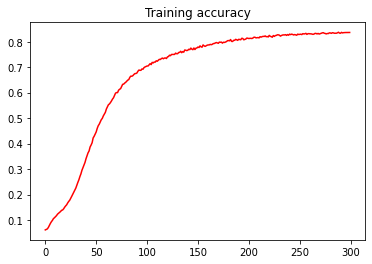

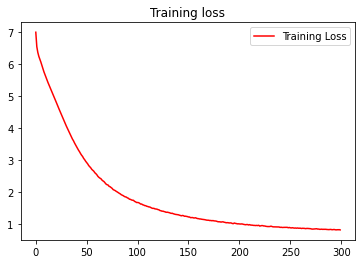

In [7]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

#### Testing Model 

In [8]:
seed_text = "The View has adorable beauty"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    prediction=model.predict(token_list) 
    predicted=np.argmax(prediction,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

The View has adorable beauty my dear and its house it is travel isle of sleep came the county can go wonder prisoner great fisted morning fair above the reason how poor all she was years two valley nor dying came the day place a wild heart high noise light was cruel song cruel girls in spring in the county hair him a rollin air was sad than bees round their blood feet say away by the foam white love of night i bore the pale high sorrowful they stood at the rocky road to dublin lass morn by their shure that made a load


In [9]:
seed_text = "Brave man fought till his last breath and died while serving to nation"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    prediction=model.predict(token_list) 
    predicted=np.argmax(prediction,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Brave man fought till his last breath and died while serving to nation me though he saw them to me to smother song and somewhere can be in old rosin the bow and joy long morning bright and joy answered rose voice dance tore rose wish be dance once dance once soon in the moaning flood of silence died of the liffey and the full bow may stars dying came the lattice morning feet feet feet hope came me short each heart rose answered with his pike and jest there long hair in a pair of sulloon save the wind of longing to quietness my way i hear from my prayer maid to


#### Saving Model

In [10]:
model.save('literature_generator.h5')

In [11]:
from tensorflow.keras.models import load_model

#### Loading Saved Model

In [12]:
literature_gen = load_model('./literature_generator.h5')

#### Testing Saved Model

In [13]:
seed_text = "The Moon Shine was beautiful"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    prediction=literature_gen.predict(token_list) 
    predicted=np.argmax(prediction,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

The Moon Shine was beautiful signor fellows of spite and the ra ground he treads the rose rose of night by the meadow art lord was in any rocky bridge of toome today in the spring of the green light feet play the magic of a tear for the bower oer the reel and the ructions of if a simple rose of sleep with her pale canal never you two god when he went by gilgarra mountain bright korea they nights in me day in the lattice high sorrowful at the wood and i— mairi than the sweetest of all the meadow parian’s perpetuity haired
